In [2]:
%matplotlib inline
import seaborn

# Burgers' equation

> Burgers' equation is a fundamental partial differential equation occuring in various areas of applied mathematics, such as fluid mechanics, nonlinear acoustics, gas dynamics, traffic flow. It is<br/> named for Johannes Martinus Burgers (1895–1981). -- [Wikipedia](https://en.wikipedia.org/wiki/Burgers%27_equation)

**Problem 1**: Inviscid Burgers'equation

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0
$$

find numerical solution on the interval $x = [1, 2]$<br/> and initial conditions $u = 1$ for $x \leq 1.5$ and $u = 0$ for $x > 1.5$.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact

In [4]:
def lax_method(u, dx, dt, v, time):
    """Solution using Lax method"""
    for t in range(time):
        uu = np.copy(u)
        for i in range(1, len(u)-1):
            u[i] = 0.5 * (uu[i+1] + uu[i-1]) \
                 - 0.5 * v * dt / dx * (uu[i+1] - uu[i-1])
    return u

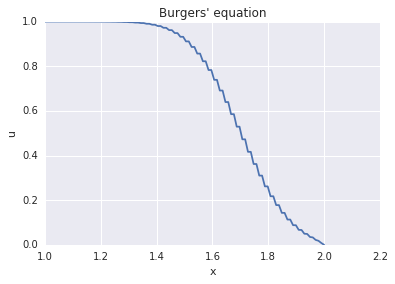

In [5]:
@interact(dx=(1e-3, 1e-1, 1e-3), dt=(1e-3, 1, 1e-2),
          velocity=(0.01, 1, 1e-2),  time=(0, 500))
def plot_result(dx=0.01, dt=0.01, velocity=0.1, time=200):
    """Interactivly plot the result"""
    ## initial conditions
    x = np.linspace(1, 2, 1/dx)
    u = np.ones_like(x)
    u[x > 1.5] = 0
    ## plot the result
    plt.title("Burgers' equation")
    plt.xlabel("x")
    plt.ylabel("u")
    plt.plot(x, lax_method(u, dx, dt, velocity, time))
    plt.grid(True)

[![QR Code](qrcode.png)](http://nbviewer.jupyter.org/url/www.physics.muni.cz/~janak/tmp/Burger.ipynb)

<center>Feel free to download, modify and run this notebook.</center>